In [1]:
import sklearn

import numpy as np
import matplotlib.pyplot as plt



# Linear regression

## Data

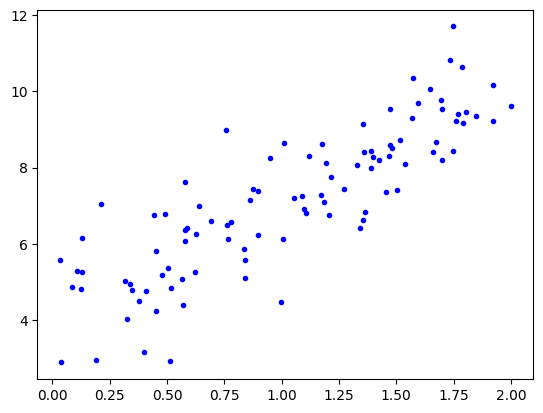

In [8]:
m = 100 

np.random.seed(2024)

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.show()

## training and validation sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2024)

X_train.shape, X_val.shape

((80, 1), (20, 1))

## Linear Regression model

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)



LinearRegression()

## training and validation mse

In [11]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_mse

0.9703078327585433

In [12]:
val_pred = lin_reg.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)
val_mse

1.2533548160664196

# Polynomial Regression

## Data

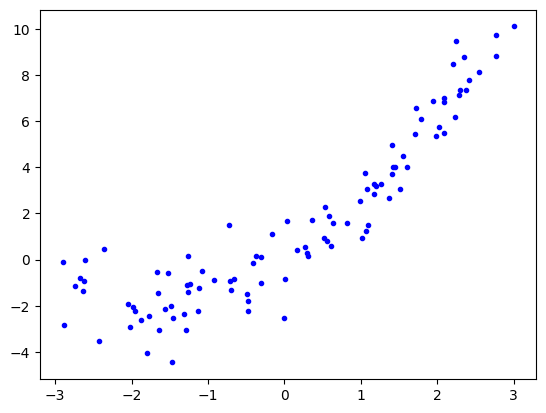

In [14]:
np.random.seed(2024)

m = 100

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X * 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.show()

## Polynomial features

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)

X_poly = poly_features.fit_transform(X)



In [25]:
X.shape, X_poly.shape

((100, 1), (100, 3))

In [26]:
X[:5, :], X_poly[:5, :]

(array([[ 0.52808711],
        [ 1.19465249],
        [-1.87108824],
        [-2.73714862],
        [-1.76988629]]),
 array([[  0.52808711,   0.278876  ,   0.14727082],
        [  1.19465249,   1.42719456,   1.70500153],
        [ -1.87108824,   3.5009712 ,  -6.55062604],
        [ -2.73714862,   7.49198255, -20.50666969],
        [ -1.76988629,   3.13249746,  -5.5441643 ]]))

## Learning Curve

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[:5,:]

array([[ 5.28087113e-01,  2.78875999e-01,  1.47270821e-01,
         7.77718230e-02,  4.10702975e-02,  2.16886949e-02,
         1.14535203e-02,  6.04845645e-03,  3.19411191e-03,
         1.68676934e-03],
       [ 1.19465249e+00,  1.42719456e+00,  1.70500153e+00,
         2.03688432e+00,  2.43336892e+00,  2.90703022e+00,
         3.47289089e+00,  4.14889773e+00,  4.95649099e+00,
         5.92128428e+00],
       [-1.87108824e+00,  3.50097120e+00, -6.55062604e+00,
         1.22567994e+01, -2.29335531e+01,  4.29107015e+01,
        -8.02897090e+01,  1.50229130e+02, -2.81091959e+02,
         5.25947859e+02],
       [-2.73714862e+00,  7.49198255e+00, -2.05066697e+01,
         5.61298026e+01, -1.53635612e+02,  4.20523502e+02,
        -1.15103532e+03,  3.15055474e+03, -8.62353655e+03,
         2.36039011e+04],
       [-1.76988629e+00,  3.13249746e+00, -5.54416430e+00,
         9.81254036e+00, -1.73670806e+01,  3.07377578e+01,
        -5.44023360e+01,  9.62859484e+01, -1.70415180e+02,
         3.

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=2024)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

train_mses, val_mses = [], []

for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    
    # training mse
    y_train_pred = model.predict(X_train[:m])
    train_mse = mean_squared_error(y_train[:m], y_train_pred)

    # validation mse
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_mses.append(train_mse)
    val_mses.append(val_mse)

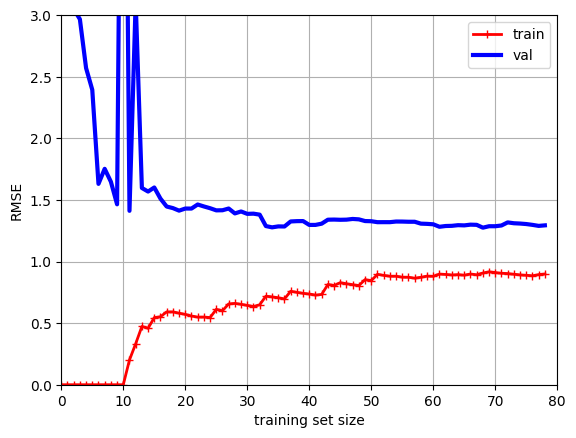

In [43]:
plt.plot(np.sqrt(train_mses), 'r-+', linewidth=2, label = 'train')
plt.plot(np.sqrt(val_mses), 'b-', linewidth = 3, label = 'val')

plt.grid()
plt.xlabel("training set size")
plt.ylabel("RMSE")

plt.axis([0,80, 0, 3])
plt.legend()

plt.show()